In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
dataset = datasets.load_iris()

In [2]:
X = pd.DataFrame(dataset.data)
y = dataset.target
X.columns = dataset.feature_names

In [3]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
for i in range(2, 10):
    kms = KMeans(n_clusters=i)
    kms.fit(X)
    centroids = kms.cluster_centers_
    labels = kms.labels_
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", i,
              "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.680813620279
For n_clusters = 3 The average silhouette_score is : 0.552591944531
For n_clusters = 4 The average silhouette_score is : 0.497825690087
For n_clusters = 5 The average silhouette_score is : 0.488517550865
For n_clusters = 6 The average silhouette_score is : 0.366504014843
For n_clusters = 7 The average silhouette_score is : 0.358247832339
For n_clusters = 8 The average silhouette_score is : 0.355378450697
For n_clusters = 9 The average silhouette_score is : 0.344695152468


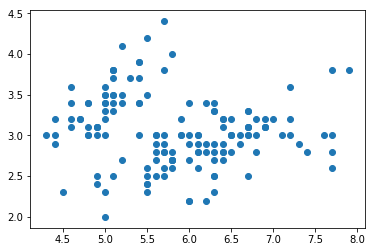

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'])

In [6]:
kms_ = KMeans(n_clusters=3)
yy = kms_.fit_predict(X)

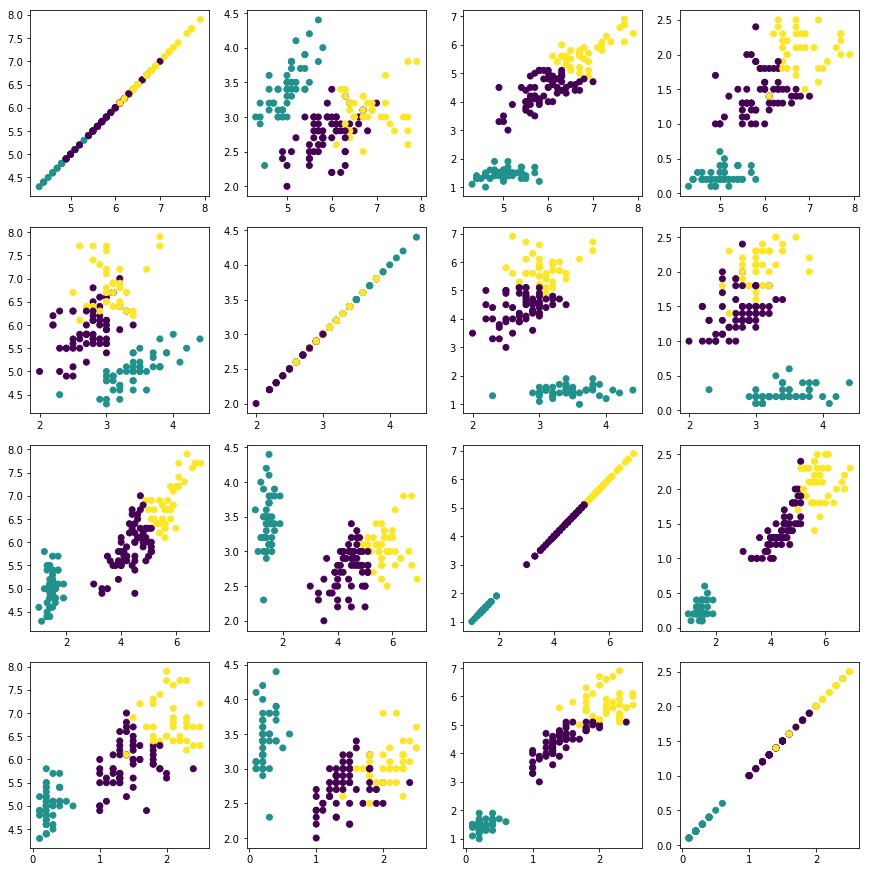

In [7]:
fig = plt.figure(figsize=(15,15))
ax = []
k = 0
ii = 0
jj = 0
for i in range(len(X.iloc[0])):
    for j in range(len(X.iloc[0])):
        ax.append(plt.subplot2grid((15,15), (ii, jj), rowspan=3, colspan=3))
        ax[k].scatter(np.asarray(X)[:, i], np.asarray(X)[:, j], c=yy)
        k += 1
        jj += 3
    ii += 3
    jj = 0
fig.tight_layout()

In [9]:
from sklearn.decomposition import PCA
X_rdc = PCA(n_components=2).fit_transform(X)

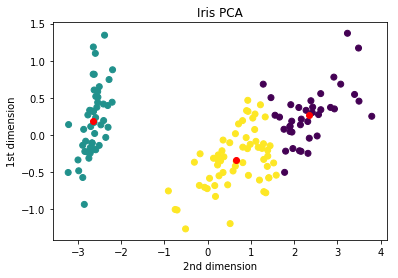

In [14]:
kmeans = KMeans(n_clusters=3).fit(X_rdc)
yy = kmeans.labels_
cc = kmeans.cluster_centers_
fig1, ax1 = plt.subplots()
ax1.scatter(X_rdc[:, 0], X_rdc[:, 1], c=yy)
ax1.set_ylabel('1st dimension')
ax1.set_xlabel('2nd dimension')
ax1.set_title('Iris PCA')
ax1.scatter(cc[:, 0], cc[:, 1], c='r')